In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


 Load Data

In [22]:
# Load data without parsing dates initially
data = pd.read_csv('D:/Week10/data/Copy of BrentOilPrices.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Display the first few rows to verify
print(data.head())

C:\Users\medha\AppData\Local\Temp\ipykernel_12716\1474243099.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


 Data Analysis

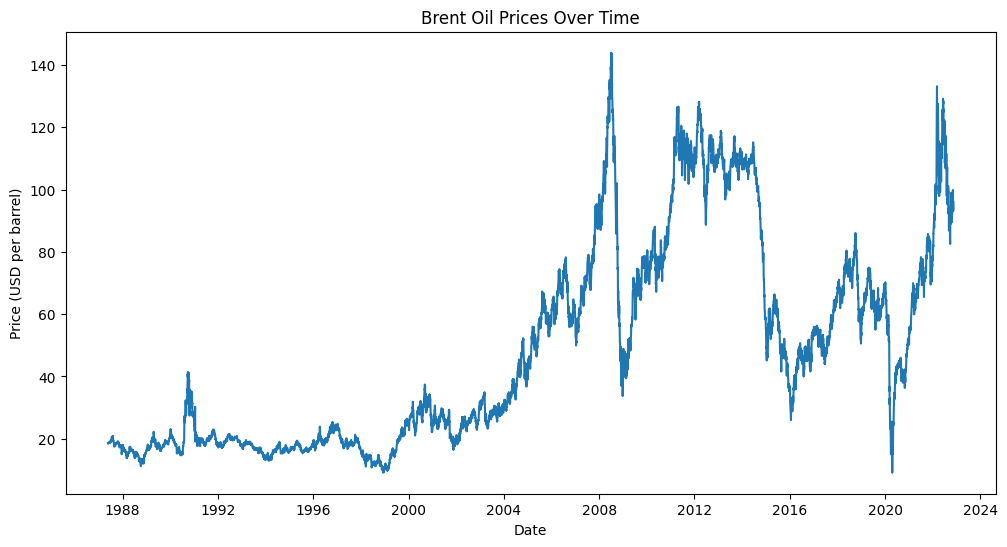

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.show()

 Feature Engineering

In [24]:
data['MA_30'] = data['Price'].rolling(window=30).mean()

 Model Selection

In [25]:
model = ARIMA(data['Price'], order=(5, 1, 0))
model_fit = model.fit()

 Model Evaluation

In [26]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Mon, 04 Nov 2024   AIC                          29093.226
Time:                        12:23:50   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1

 Forecasting

In [27]:
forecast = model_fit.forecast(steps=10)

 Communication of Results

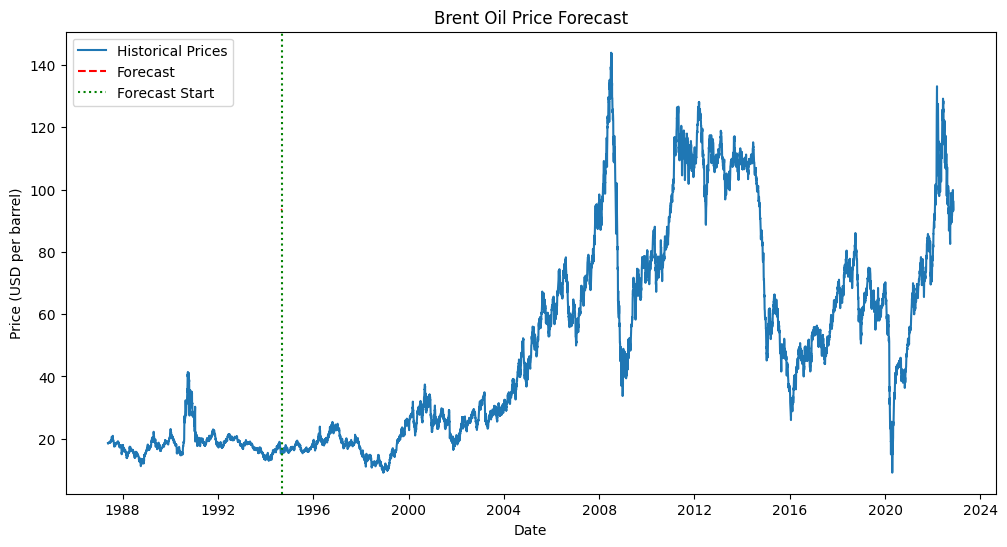

In [28]:


# Assuming 'forecast' is a Pandas Series and has a datetime index
plt.figure(figsize=(12, 6))

# Plot historical prices
plt.plot(data['Date'], data['Price'], label='Historical Prices')

# Plot forecast
plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')

# Add vertical line at the forecast date
forecast_date = forecast.index[0]  # Adjust this as needed for the specific date
plt.axvline(x=forecast_date, color='green', linestyle=':', label='Forecast Start')

# Title and labels
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')

# Legend
plt.legend()

# Show the plot
plt.show()

In [29]:
# Predictions
data['Forecast'] = model_fit.fittedvalues

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data['Price'], data['Forecast']))
print(f'RMSE: {rmse}')

RMSE: 1.2308591583610657
